# Project: Investigate TMDb movie dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Brief introduction**: This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. I will be looking at the following areas of interest:
> 1. Movies production trends over time
> 2. Top Movies by Earning
> 3. Top Movies by Revenue
> 4. Most Expensive Movies by Budget
> 5. Top Movies by Runtime
> 6. Revenue trends over time
> 7. Earning Trends over time
> 8. Movies Runtime Mean Over Time
> 9. Movies Count by Genre
> 10. Ranking Directors by Movies
> 11. Ranking actors by Movies
> 12. What are the correlations between the numeric variables?

<a id='wrangling'></a>
## Data Wrangling

I will import all most common libraries used in data analysis and visualization

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

load the data from the source dataset with `pd.read_csv(url)`

In [2]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd1c4c_tmdb-movies/tmdb-movies.csv'
df = pd.read_csv(url)

Below would generate an initial report and findings about the original dataset and other initial observations

In [3]:
from pandas_profiling import ProfileReport
prof = ProfileReport(df)
prof.to_file(output_file='initial_data_report.html')

data inspection with `.head()`

In [4]:
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [5]:
df.tail(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


`df.info()` to explore the df class, ranges of index, columns, and data, structure, dtypes, and glence at NaN.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

### Data cleaning and formatting

Based on above questions, I decided to drop some columns as follows:

1. imdb_id
2. homepage
3. tagline
4. keywords
5. overview
6. production_companies
7. vote_count
8. vote_average
9. budget_adj
10. revenue_adj

In [7]:
drop_cols = ['id','imdb_id', 'homepage', 'tagline', 'keywords',
             'overview','production_companies','budget_adj',
             'revenue_adj','vote_average','vote_count']
df.drop(drop_cols,axis=1,inplace=True)
df.head(2)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,2015


`.describe` for quick initial stats before cleaning to explore the limits, means, etc

In [8]:
df.describe().astype(int).round(2)

,popularity,budget,revenue,runtime,release_year
count,10866,10866,10866,10866,10866
mean,0,14625701,39823319,102,2001
std,1,30913213,117003486,31,12
min,0,0,0,0,1960
25%,0,0,0,90,1995
50%,0,0,0,99,2006
75%,0,15000000,24000000,111,2011
max,32,425000000,2781505847,900,2015


`popularity` statistics shows issues with the data such as outliers. let's examine it further with a boxplot.

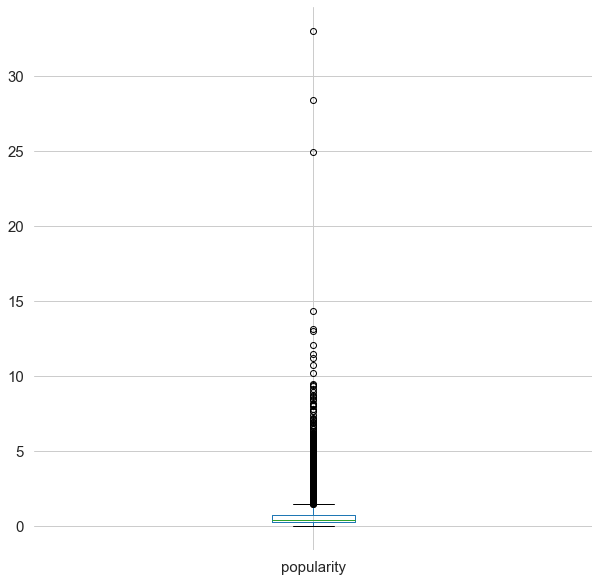

In [9]:
df.boxplot(column=['popularity'],figsize=(10,10), fontsize=15);

a `boxplot` clearly helps visualizing the issues with `popularity` dataset so I decided to wipe it off until inestigated and confirmed.

In [10]:
# drop popularity column for above reason
drop_cols = ['popularity']
df.drop(drop_cols,axis=1,inplace=True)
df.head(2)

,budget,revenue,original_title,cast,director,runtime,genres,release_date,release_year
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,2015
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,2015


In [11]:
# clean rows with zero dollars by converting to NaN and then delete with other NaN values
cols = ['budget','revenue']
df[cols] = df[cols].replace({0:np.nan})

In [12]:
# drop all rows with NaN
df.dropna(inplace=True)

In [13]:
# find rows that has NaN value(s)
df.isna().any()

budget            False
revenue           False
original_title    False
cast              False
director          False
runtime           False
genres            False
release_date      False
release_year      False
dtype: bool

In [14]:
df.isna().any().sum()

0

In [15]:
df.drop_duplicates(keep='first',inplace=True)

In [16]:
df['release_date'] = df['release_date'].astype('datetime64[ns]')
df['release_year'] = df['release_year'].astype(int)
df['budget'] = df['budget'].astype(int)
df['revenue'] = df['revenue'].astype(int)

final inspection before exporting data to new data file

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3849 entries, 0 to 10848
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   budget          3849 non-null   int64         
 1   revenue         3849 non-null   int64         
 2   original_title  3849 non-null   object        
 3   cast            3849 non-null   object        
 4   director        3849 non-null   object        
 5   runtime         3849 non-null   int64         
 6   genres          3849 non-null   object        
 7   release_date    3849 non-null   datetime64[ns]
 8   release_year    3849 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 300.7+ KB


In [18]:
# export csv 1st version
df.to_csv('data_v1.csv',index=False)

<a id='eda'></a>
## Exploratory Data Analysis

In [19]:
# read cleaned data file
df = pd.read_csv('data_v1.csv')

In [20]:
# run quick statistics 
df.describe().astype(int).round(2)

,budget,revenue,runtime,release_year
count,3849,3849,3849,3849
mean,37248859,107814811,109,2001
std,42216988,176617525,19,11
min,1,2,15,1960
25%,10000000,13670688,95,1995
50%,24000000,44907260,106,2004
75%,50000000,124305181,119,2010
max,425000000,2781505847,338,2015


Comments:
   * After cleaning, the zeros from revenue/budget min, 25% and 50% disappeared.

re-arrange columns for readability

In [21]:
cols = list(df.columns.values)
cols
df = df[['release_year','original_title','genres','release_date','cast','director','runtime','budget','revenue']]

final inspection before saving to a new csv file version 2

In [22]:
df.head(2)

,release_year,original_title,genres,release_date,cast,director,runtime,budget,revenue
0,2015,Jurassic World,Action|Adventure|Science Fiction|Thriller,2015-06-09,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,150000000,1513528810
1,2015,Mad Max: Fury Road,Action|Adventure|Science Fiction|Thriller,2015-05-13,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,150000000,378436354


save to csv version 2

In [23]:
df.to_csv('data_v2.csv',index=False)

read last cleaned dataset

In [24]:
df = pd.read_csv('data_v2.csv')

### Question 1: Movies production trends over time

release_year
2011    199
2012    157
2013    180
2014    165
2015    160
Name: release_date, dtype: int64


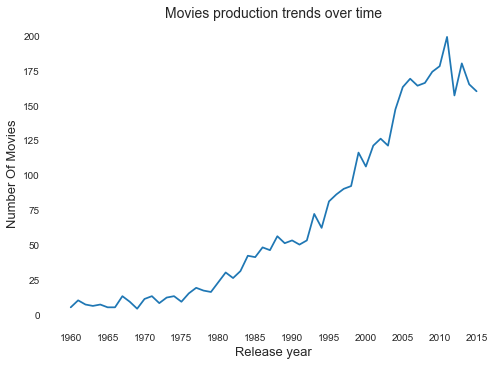

In [25]:
# make group for each year and count the number of movies in each year 
data=df.groupby('release_year').count()['release_date']
print(data.tail())

#make group of the data according to their release year and count the total number of movies in each year and pot.
df.groupby('release_year').count()['release_date'].plot(xticks = np.arange(1960,2016,5))

#set the figure size and labels
sns.set(rc={'figure.figsize':(10,5)})
plt.title("Movies production trends over time",fontsize = 14)
plt.xlabel('Release year',fontsize = 13)
plt.ylabel('Number Of Movies',fontsize = 13)
#set the style sheet
sns.set_style("whitegrid")

### Question 2: Top Movies by Earning

In [26]:
#calculate earning for each of the movie
#add a new column in the dataframe name 'earning'
df['earning'] = df['revenue'] - df['budget']

In [27]:
#defining the function
def calculate(column):
    #for max revenues
    max_value  = df[column].idxmax()
    df_max     = pd.DataFrame(df.loc[max_value])
    
    #for min revenues
    min_value  = df[column].idxmin()
    df_min     = pd.DataFrame(df.loc[min_value])
    
    #conact both df
    df_max_min = pd.concat([df_max, df_min], axis=1)
    return df_max_min

In [28]:
#to call the function use below command
df_x = calculate('earning')
columns = {df_x.columns[0]:'df_max_output',df_x.columns[1]:'df_min_output'}
df_x = df_x.rename(columns = columns)
df_x

,df_max_output,df_min_output
release_year,2009,2010
original_title,Avatar,The Warrior's Way
genres,Action|Adventure|Fantasy|Science Fiction,Adventure|Fantasy|Action|Western|Thriller
release_date,2009-12-10,2010-12-02
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,James Cameron,Sngmoo Lee
runtime,162,100
budget,237000000,425000000
revenue,2781505847,11087569
earning,2544505847,-413912431


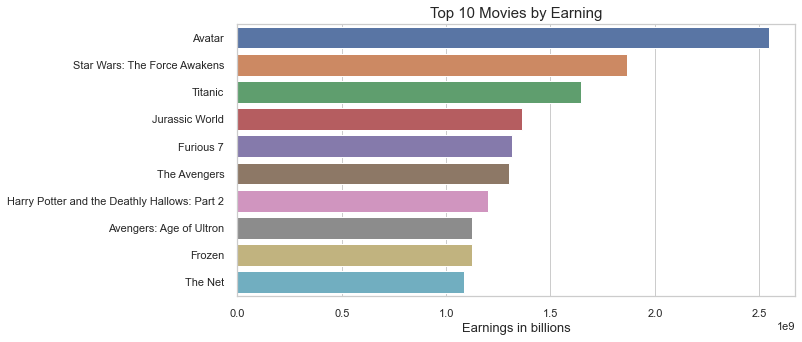

In [29]:
#make a plot which contain top 10 movies which earn highest earning.
#sort the 'earning' column in decending order and store it in the new dataframe,
info = pd.DataFrame(df['earning'].sort_values(ascending = False))
info['original_title'] = df['original_title']
data = list(map(str,(info['original_title'])))
x = list(data[:10])
y = list(info['earning'][:10])

#make a plot usinf pointplot for top 10 earningable movies.
ax = sns.barplot(x=y,y=x)

#setup the figure size
sns.set(rc={'figure.figsize':(10,5)})
#setup the title and labels of the plot.
ax.set_title("Top 10 Movies by Earning",fontsize = 15)
ax.set_xlabel("Earnings in billions",fontsize = 13)
sns.set_style("darkgrid")

### Question 3: Top Movies by Revenue

In [30]:
# Re-calling above def
df_x = calculate('revenue')
columns = {df_x.columns[0]:'df_max_output',df_x.columns[1]:'df_min_output'}
df_x = df_x.rename(columns = columns)
df_x

,df_max_output,df_min_output
release_year,2009,2003
original_title,Avatar,Shattered Glass
genres,Action|Adventure|Fantasy|Science Fiction,Drama|History
release_date,2009-12-10,2003-11-14
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Hayden Christensen|Peter Sarsgaard|ChloÃ« Sevi...
director,James Cameron,Billy Ray
runtime,162,94
budget,237000000,6000000
revenue,2781505847,2
earning,2544505847,-5999998


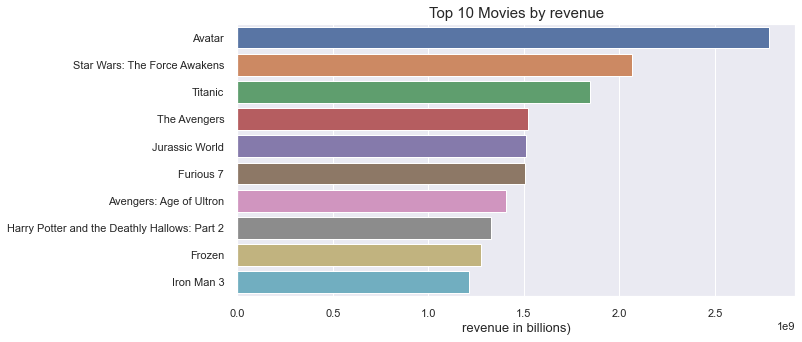

In [31]:
#make a plot which contain top 10 movies by revenue.
#sort the 'revenue' column in decending order and store it in the new dataframe.
info = pd.DataFrame(df['revenue'].sort_values(ascending = False))
info['original_title'] = df['original_title']
data = list(map(str,(info['original_title'])))

#extract the top 10 budget movies data from the list and dataframe.
x = list(data[:10])
y = list(info['revenue'][:10])

#plot the figure and setup the title and labels.
ax = sns.barplot(x=y,y=x)
sns.set(rc={'figure.figsize':(10,5)})
ax.set_title("Top 10 Movies by revenue",fontsize = 15)
ax.set_xlabel("revenue in billions)",fontsize = 13)
sns.set_style("darkgrid")

### Question 4: Most Expensive Movies by Budget

In [32]:
# re-calling previous def
df_x = calculate('budget')
columns = {df_x.columns[0]:'df_max_output',df_x.columns[1]:'df_min_output'}
df_x = df_x.rename(columns = columns)
df_x

,df_max_output,df_min_output
release_year,2010,1999
original_title,The Warrior's Way,Lost & Found
genres,Adventure|Fantasy|Action|Western|Thriller,Comedy|Romance
release_date,2010-12-02,1999-04-23
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,David Spade|Sophie Marceau|Ever Carradine|Step...
director,Sngmoo Lee,Jeff Pollack
runtime,100,95
budget,425000000,1
revenue,11087569,100
earning,-413912431,99


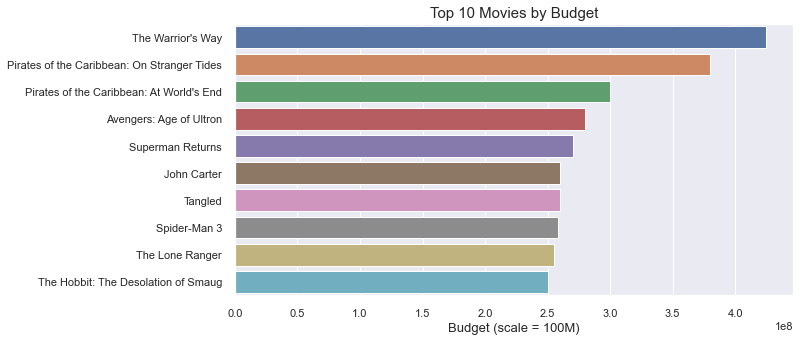

In [33]:
#make a plot which contain top 10 movies by budget.
#sort the 'budget' column in decending order and store it in the new dataframe.
info = pd.DataFrame(df['budget'].sort_values(ascending = False))
info['original_title'] = df['original_title']
data = list(map(str,(info['original_title'])))

#extract the top 10 budget movies data from the list and dataframe.
x = list(data[:10])
y = list(info['budget'][:10])

#plot the figure and setup the title and labels.
ax = sns.barplot(x=y,y=x)
sns.set(rc={'figure.figsize':(10,5)})
ax.set_title("Top 10 Movies by Budget",fontsize = 15)
ax.set_xlabel("Budget (scale = 100M)",fontsize = 13)
sns.set_style("darkgrid")

### Question 5: Top Movies by Runtime

In [34]:
# re call the def
df_x = calculate('runtime')
columns = {df_x.columns[0]:'df_max_output',df_x.columns[1]:'df_min_output'}
df_x = df_x.rename(columns = columns)
df_x

,df_max_output,df_min_output
release_year,2010,2003
original_title,Carlos,Kid's Story
genres,Crime|Drama|Thriller|History,Science Fiction|Animation
release_date,2010-05-19,2003-06-02
cast,Edgar RamÃ­rez|Alexander Scheer|Fadi Abi Samra...,Clayton Watson|Keanu Reeves|Carrie-Anne Moss|K...
director,Olivier Assayas,Shinichiro Watanabe
runtime,338,15
budget,18000000,10
revenue,871279,5
earning,-17128721,-5


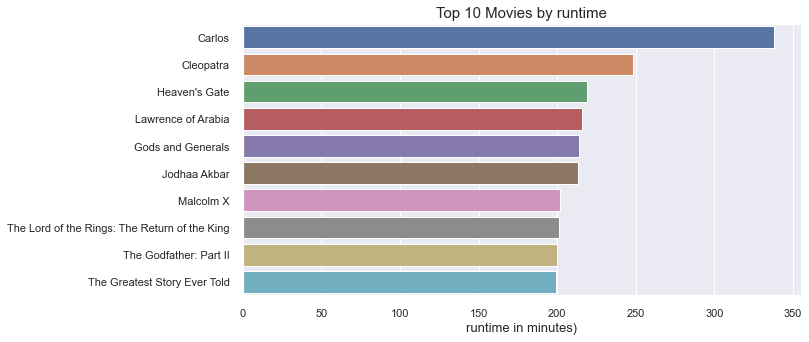

In [35]:
#make a plot which contain top 10 movies by runtime.
#sort the 'runtime' column in decending order and store it in the new dataframe.
info = pd.DataFrame(df['runtime'].sort_values(ascending = False))
info['original_title'] = df['original_title']
data = list(map(str,(info['original_title'])))

#extract the top 10 budget movies data from the list and dataframe.
x = list(data[:10])
y = list(info['runtime'][:10])

#plot the figure and setup the title and labels.
ax = sns.barplot(x=y,y=x)
sns.set(rc={'figure.figsize':(10,5)})
ax.set_title("Top 10 Movies by runtime",fontsize = 15)
ax.set_xlabel("runtime in minutes)",fontsize = 13)
sns.set_style("darkgrid")

### Question 6: Revenue trends over time

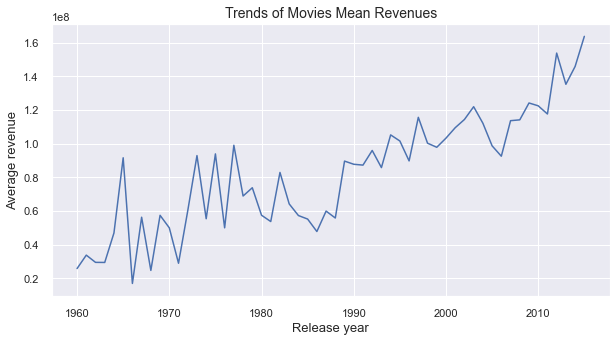

In [36]:
#do year-wise analysis of revenue earn by movies in each earn.
#take the average of revenue made by movies in each year and plot.
#make the group of the data according to their release_year and find the mean revenue and plot.
df.groupby('release_year')['revenue'].mean().plot()

#setup the title and labels of the figure.
plt.title("Trends of Movies Mean Revenues",fontsize = 14)
plt.xlabel('Release year',fontsize = 13)
plt.ylabel('Average revenue',fontsize = 13)

#setup the figure size.
sns.set(rc={'figure.figsize':(10,5)})
sns.set_style("whitegrid")

### Question 7: Earning Trends over time

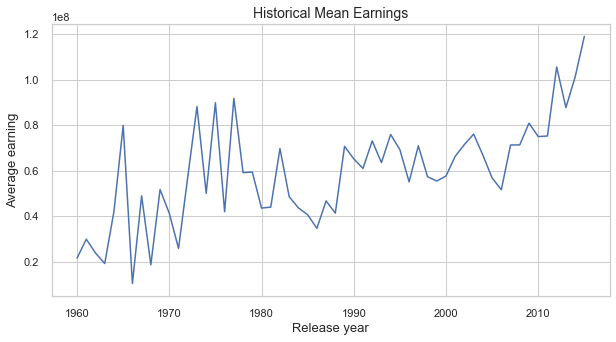

In [37]:
df.groupby('release_year')['earning'].mean().plot()

#setup the title and labels of the figure.
plt.title("Historical Mean Earnings",fontsize = 14)
plt.xlabel('Release year',fontsize = 13)
plt.ylabel('Average earning',fontsize = 13)

#setup the figure size.
sns.set(rc={'figure.figsize':(10,5)})
sns.set_style("whitegrid")

### Question 8: Movies Runtime Mean Over Time

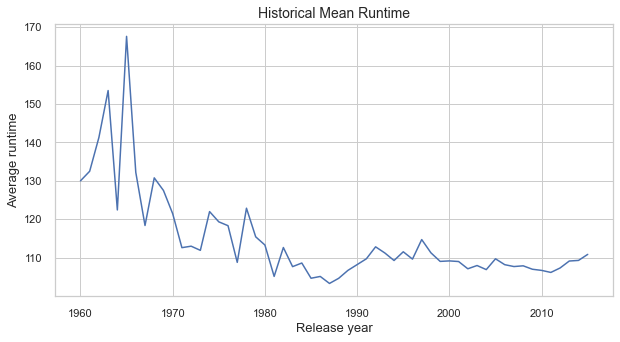

In [38]:
df.groupby('release_year')['runtime'].mean().plot()

#setup the title and labels of the figure.
plt.title("Historical Mean Runtime",fontsize = 14)
plt.xlabel('Release year',fontsize = 13)
plt.ylabel('Average runtime',fontsize = 13)

#setup the figure size.
sns.set(rc={'figure.figsize':(10,5)})
sns.set_style("whitegrid")

### Question 9: Movies Count by Genre

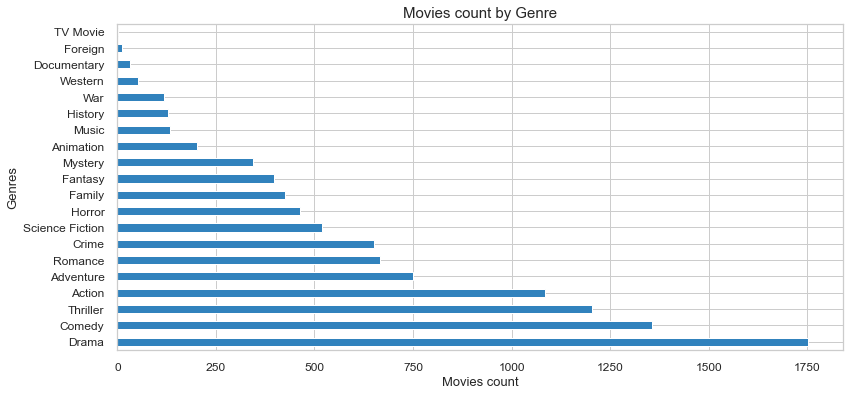

In [39]:
#make a function to convert to string, split and convert to series then measure unique data frequency
def data_count(x):
    #concatenate all the rows of a column into a string
    data_str = df[x].str.cat(sep = '|')
    data_series = pd.Series(data_str.split('|'))
    #count frequency of each unique data and return Output
    info = data_series.value_counts(ascending=False)
    return info

#call the function for counting the movies of each genre.
genres_data_count = data_count('genres')
#plot a 'barh' plot using plot function for 'genre vs number of movies'.
genres_data_count.plot(kind= 'barh',figsize = (13,6),fontsize=12,colormap='tab20c')

#setup the title and the labels of the plot.
plt.title("Movies count by Genre",fontsize=15)
plt.xlabel('Movies count',fontsize=13)
plt.ylabel("Genres",fontsize= 13)
sns.set_style("whitegrid")

### Question 10: Ranking Directors by Movies

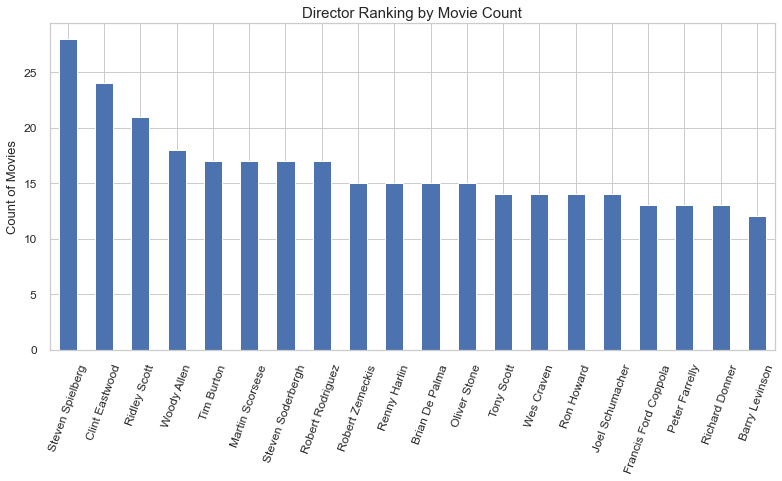

In [40]:
#make a function to convert to string, split and convert to series then measure unique data frequency
def data_count(x):
    #concatenate all the rows of a column into a string
    data_str = df[x].str.cat(sep = '|')
    data_series = pd.Series(data_str.split('|'))
    #count frequency of each unique data and return Output
    info = data_series.value_counts(ascending=False)
    return info

#call the function for counting the movies of each director
direct_data_count = data_count('director')

#plot a barh graph
my_colors = [(x/10.0, x/20.0, 0.75) for x in range(len(direct_data_count))]
direct_data_count.iloc[:20].plot(kind='bar',figsize=(13,6),fontsize=12)

#setup the title and the labels 
plt.title("Director Ranking by Movie Count",fontsize=15)
plt.xticks(rotation=70)
plt.ylabel("Count of Movies",fontsize= 13)
sns.set_style("whitegrid")

### Question 11: Ranking actors by Movies

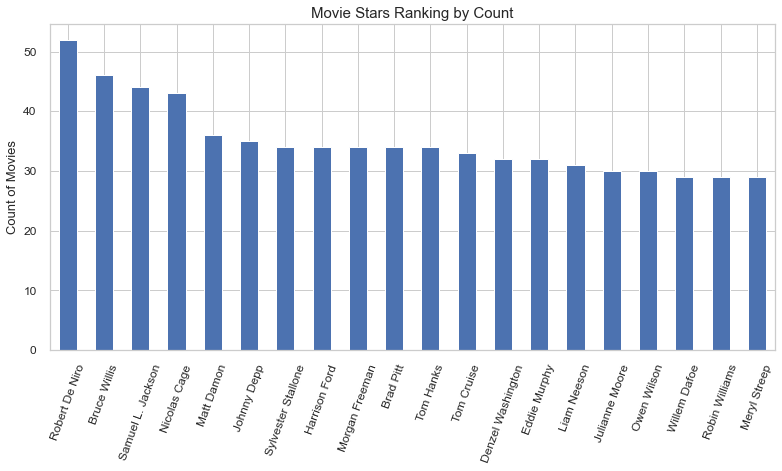

In [41]:
#make a function to convert to string, split and convert to series then measure unique data frequency
def data_count(x):
    #concatenate all the rows of a column into a string
    data_str = df[x].str.cat(sep = '|')
    data_series = pd.Series(data_str.split('|'))
    #count frequency of each unique data and return Output
    info = data_series.value_counts(ascending=False)
    return info

#call the function for counting the movies of each cast
cast_data_count = data_count('cast')

#plot a barh graph
my_colors = [(x/10.0, x/20.0, 0.75) for x in range(len(cast_data_count))]
cast_data_count.iloc[:20].plot(kind='bar',figsize=(13,6),fontsize=12)

#setup the title and the labels 
plt.title("Movie Stars Ranking by Count",fontsize=15)
plt.xticks(rotation=70)
plt.ylabel("Count of Movies",fontsize= 13)
sns.set_style("whitegrid")

### Question 12: What are the correlations between the numeric variables?

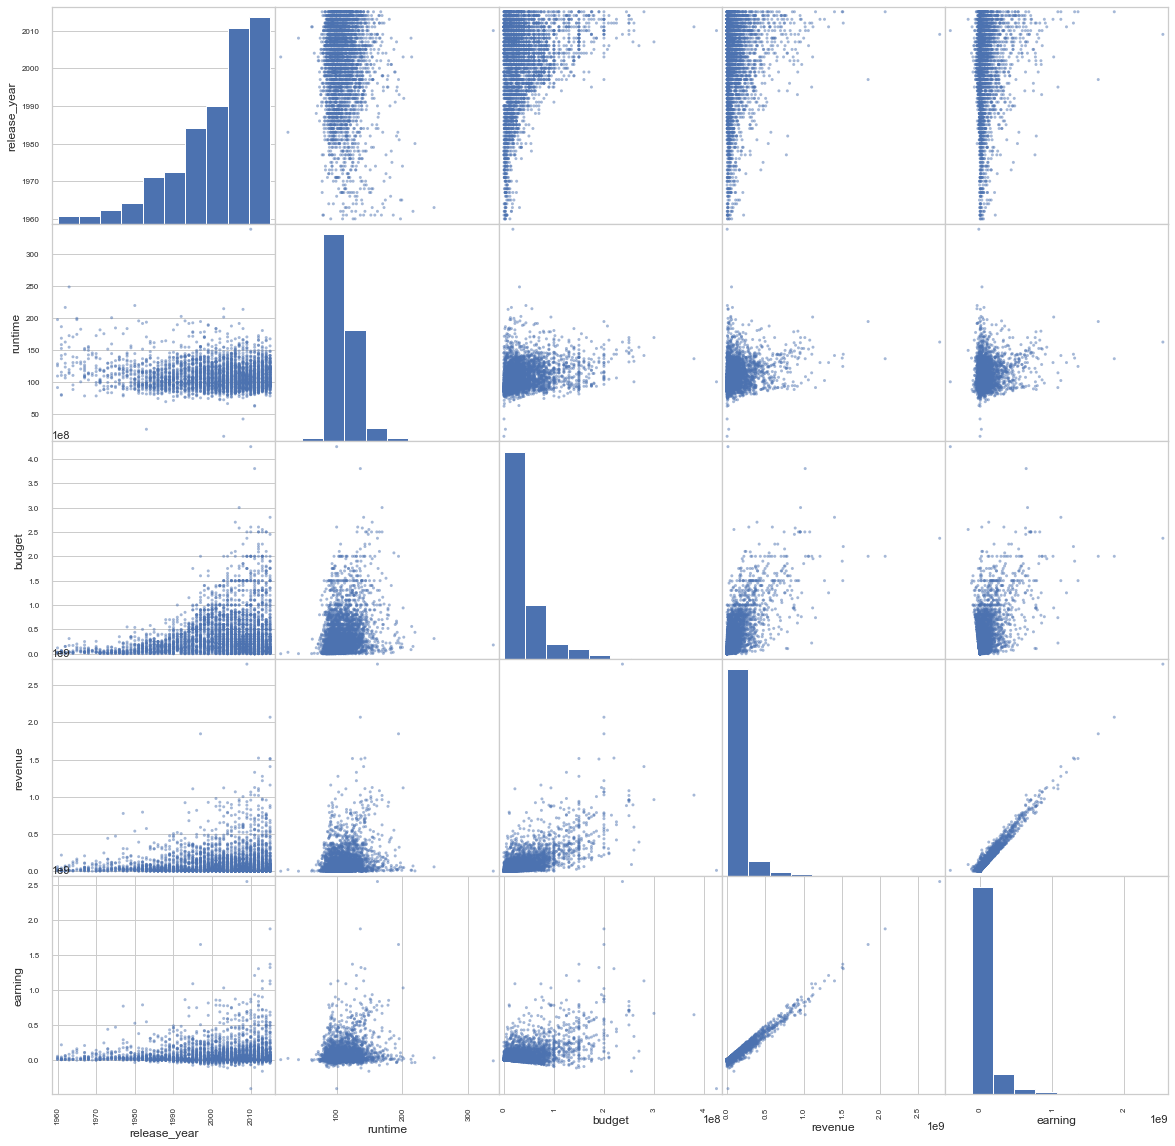

In [42]:
# for a quick insight into numerical values (excluding id), we use below function:
pd.plotting.scatter_matrix(df,figsize=(20,20));

In [43]:
# Correlation summary
df.corr()

,release_year,runtime,budget,revenue,earning
release_year,1.000000,-0.112954,0.268464,0.139316,0.088069
runtime,-0.112954,1.000000,0.261489,0.250728,0.220597
budget,0.268464,0.261489,1.000000,0.688403,0.526660
revenue,0.139316,0.250728,0.688403,1.000000,0.979138
earning,0.088069,0.220597,0.526660,0.979138,1.000000


See [Correlation coefficient](https://www.statisticssolutions.com/pearsons-correlation-coefficient/) for more info.

In [44]:
# Correlation summary
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,release_year,runtime,budget,revenue,earning
release_year,1.000000,-0.112954,0.268464,0.139316,0.088069
runtime,-0.112954,1.000000,0.261489,0.250728,0.220597
budget,0.268464,0.261489,1.000000,0.688403,0.526660
revenue,0.139316,0.250728,0.688403,1.000000,0.979138
earning,0.088069,0.220597,0.526660,0.979138,1.000000


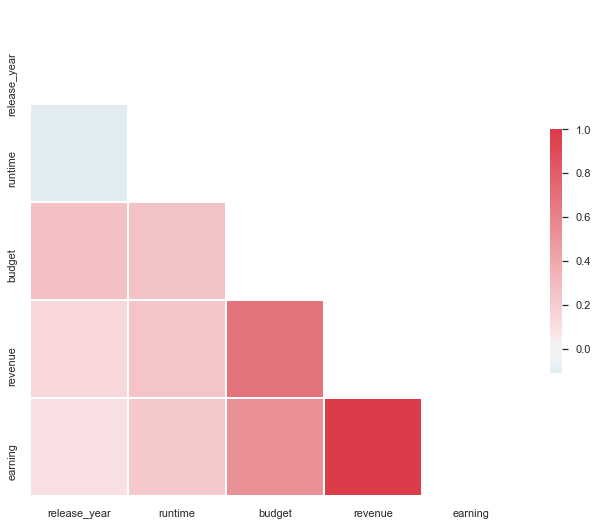

In [45]:
corr = df.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

<a id='conclusions'></a>
## Conclusions

We have analysed movies from different aspects and ended up with the following conclusions: <br>

### Question 1: Movies production trends over time
> Movie production Continued growing between 1960-2010 and Suddenly dropped in 2011 and fluctuated aroud 160.<br>

### Question 2: Top Movies by Earning
> Avatar Obviously hit the records followed by Star Wars.

### Question 3: Top Movies by Revenue
> Expectedly the higher the earning the higher the revenue so yes Avatar and Star Wars hit the records.

### Question 4: Most Expensive Movies by Budget
> Amazingly the top list wasn't so correlated with earning/revenue list but different list with The Worriors Way and Pirates of the Caribbean hitting the list.

### Question 5: Top Movies by Runtime
> We can obviously see the Carlos hitting the record with 338 min however the second record was <250 min so lengthy movies wasn't a target for producers.

### Question 6: Revenue trends over time
> Expectedly, we see a trending up mean revenues as value of currency is normally depreciating and tickets pricing would normal go up.

### Question 7: Earning Trends over time
> Unexpectedly, although the mean of earning increased overall yet there were inner steep fluctuations from year to year due for further investigations on external factors.

### Question 8: Movies Runtime Mean Over Time
> The mean runtime continued declining nearly the overall mean runtime of 115 min.

### Question 9: Movies Count by Genre
> Drama hit the list followed by comedy, thriller, action and adventure.

### Question 10: Ranking Directors by Movies
> The director Steven Spielberg has the highest count followed by Clint Eastwood and Ridley Scott.

### Question 11: Ranking actors by Movies
> Robert De Niro with 52 movies follow by Bruce Willis with 46 movies and third Samuel L. Jackson with 44 movies.

### Question 12: What are the correlations between the numeric variables?
> The correlation summary shows strong correlations between earnings and budget not to mention the revenues. The budget has a positive yet low correlation with movie runtime which is reasonable.

### Observations

From the correlation matrix we noticed a strong positive correlation between budget and earning so **`historically`** movies with higher budget had higher earnings.

### Recommedations

Attached to this report is an initial_data_report.html which clearly shows the following comments on original Dataset:
   * Dataset has 1 (< 0.1%) duplicate rows
   * High cardiality of 52% of variables makes data analysis more difficult and time consuming. Some could be insignificant to be dropped while others are not.
   * Very strong correlation betwwen budget/revenue and budget_adj/revenue_adj is misleading and wasn't defined by the data provider. So assuming was made to drop them.
   * ~10% of production_companies data is missing so I decided to ignore this variable in my analysis.
   * From financial point of view, lots of data in the four columns budget/revenue and budget_adj/revenue_adj were found tp have high volume of zeros (+50%) so I decided to drop almost half of the dataset.

All of the above dataset issues would definitely increase the probability of higher accuracy in the data analysis outcomes and conclusions. So I recommend to investigate all above and try harder to mitigate their impact.
    